# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Reading Data Set

In [2]:
df = pd.read_excel("D:/Great Lakes BA Cert/Capstone/Sales.xlsx")

# Basic Data Exploration

In [3]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [6]:
df.shape

(4520, 20)

# Null value Analysis

In [7]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

# Check For Duplicate

In [8]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 0


,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [10]:
df.head(10)

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
5,7000005,3252,7.0,NaN,Third Party Partner,Salaried,Graduate,Male,3,Executive,2.0,Single,18068.0,0,2.0,487836.0,North,Half Yearly,6,5.0
6,7000006,3850,12.0,23.0,Agent,Salaried,Graduate,Male,4,VP,3.0,Divorced,34999.0,0,2.0,392689.0,North,Yearly,9,2.0
7,7000007,2073,6.0,4.0,Agent,Small Business,Under Graduate,Female,3,Executive,4.0,Unmarried,17279.0,0,2.0,369079.0,West,Half Yearly,3,3.0
8,7000008,2719,8.0,11.0,Agent,Salaried,Graduate,Male,4,Manager,3.0,Divorced,20916.0,1,1.0,405143.0,West,Yearly,1,4.0
9,7000009,3247,6.0,3.0,Online,Small Business,Under Graduate,Male,2,Exe,2.0,Married,17089.0,0,1.0,NaN,West,Quarterly,2,4.0


# Imputing Values for Nans

In [11]:
model1=df['Age'].mode()[0]
model2=df['CustTenure'].mode()[0]
model3=df['MonthlyIncome'].mean()
model4=df['ExistingPolicyTenure'].mode()[0]
model5=df['SumAssured'].mean()
model6=df['CustCareScore'].mode()[0]
model7=df['NumberOfPolicy'].mode()[0]
df['Age'].replace(np.nan,model1,inplace=True)
df['CustTenure'].replace(np.nan,model2,inplace=True)
df['MonthlyIncome'].replace(np.nan,model3,inplace=True)
df['ExistingPolicyTenure'].replace(np.nan,model4,inplace=True)
df['SumAssured'].replace(np.nan,model5,inplace=True)
df['CustCareScore'].replace(np.nan,model6,inplace=True)
df['NumberOfPolicy'].replace(np.nan,model7,inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [14]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.000000,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.000000,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,619999.699267,North,Yearly,0,3.0
3,7000003,1791,11.0,4.0,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.000000,West,Half Yearly,0,5.0
4,7000004,2955,6.0,4.0,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.000000,West,Half Yearly,2,5.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4520 non-null   float64
 3   CustTenure            4520 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4520 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4520 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4520 non-null   float64
 15  SumAssured           

# Univaraite Analysis with Box Plot & Density Graph

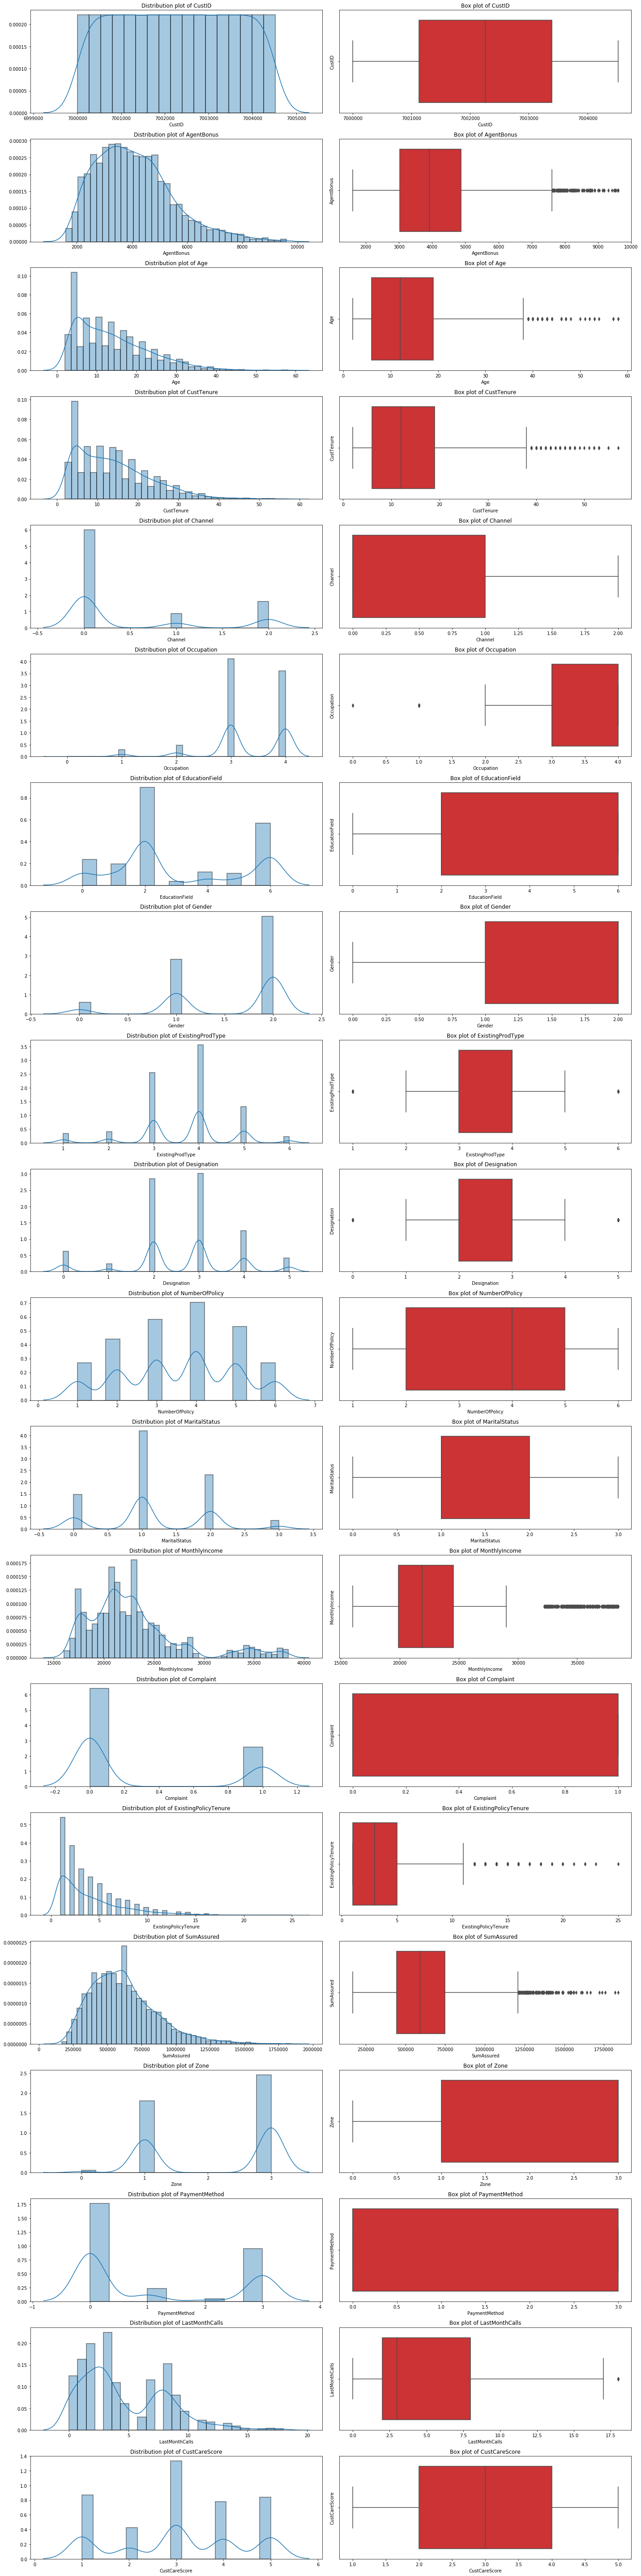

In [16]:
a = len(df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,80))

for i in df.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = df[i], orient='h', palette='Set1')
    c = c + 1

plt.tight_layout()
plt.show()

In [17]:
df_cat = df.select_dtypes(include = ['object'])
lstcategoriccolumns = list(df_cat.columns.values)
columnlen=len(lstcategoriccolumns)
print("Total Numerical Columns = ",columnlen)

Total Numerical Columns =  8


In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
columnlen=len(lstnumericcolumns)
print("Total Numerical Columns = ",columnlen)

Total Numerical Columns =  12


# Outlier Treatment

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in df_num.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

# Univaraite Analysis After Outlier Treament

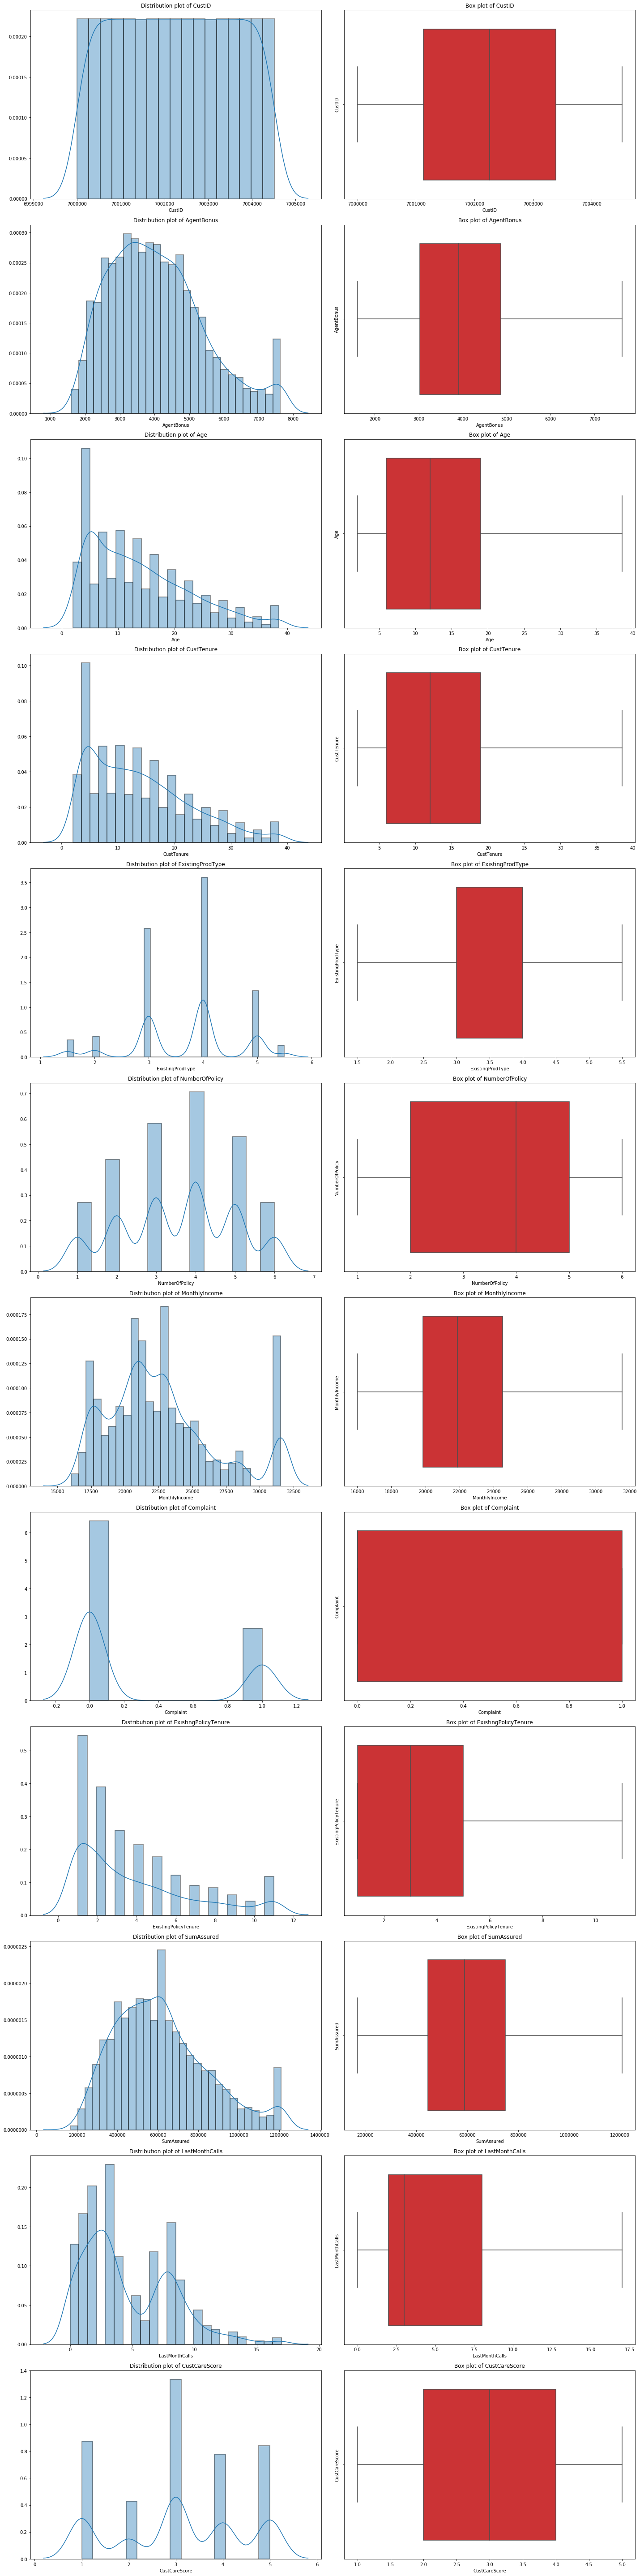

In [26]:
a = len(df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,80))

for i in df.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = df[i], orient='h', palette='Set1')
    c = c + 1

plt.tight_layout()
plt.show()

# Bivaraite analysis

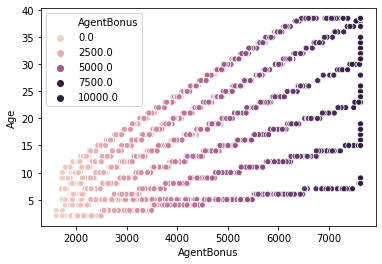

In [27]:
sns.scatterplot(x='AgentBonus',y='Age',data=df,hue='AgentBonus')

# Checking for Correlation using Heatmap

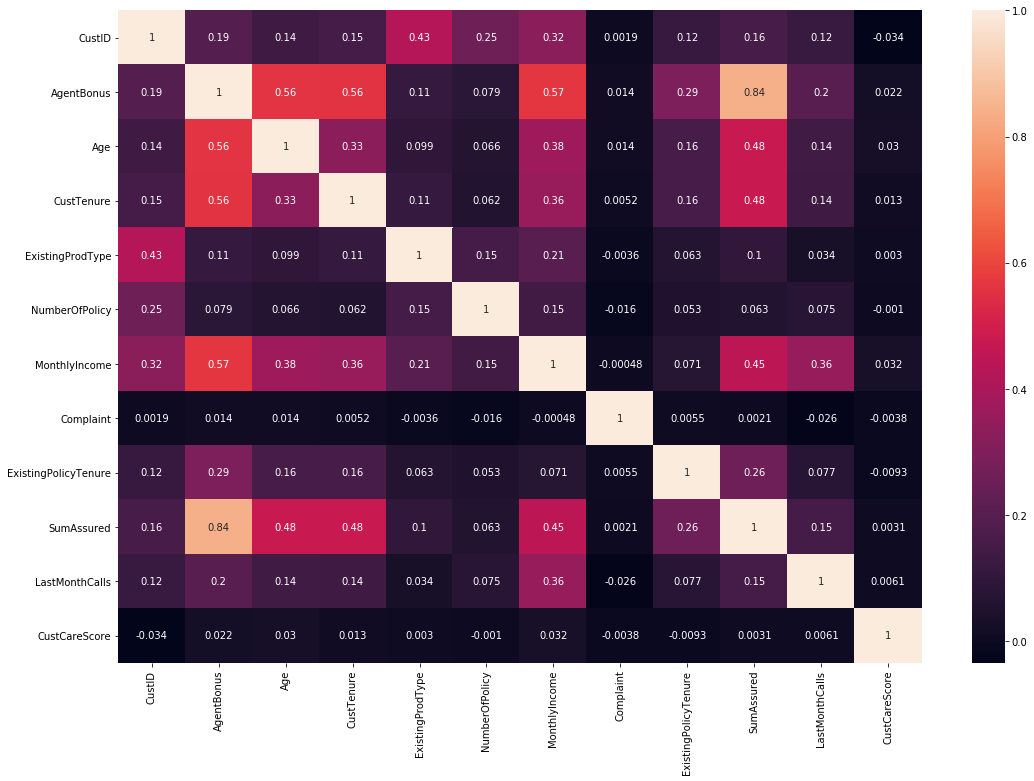

In [21]:
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot=True);

# Bivaraite Analysis With target Varaible

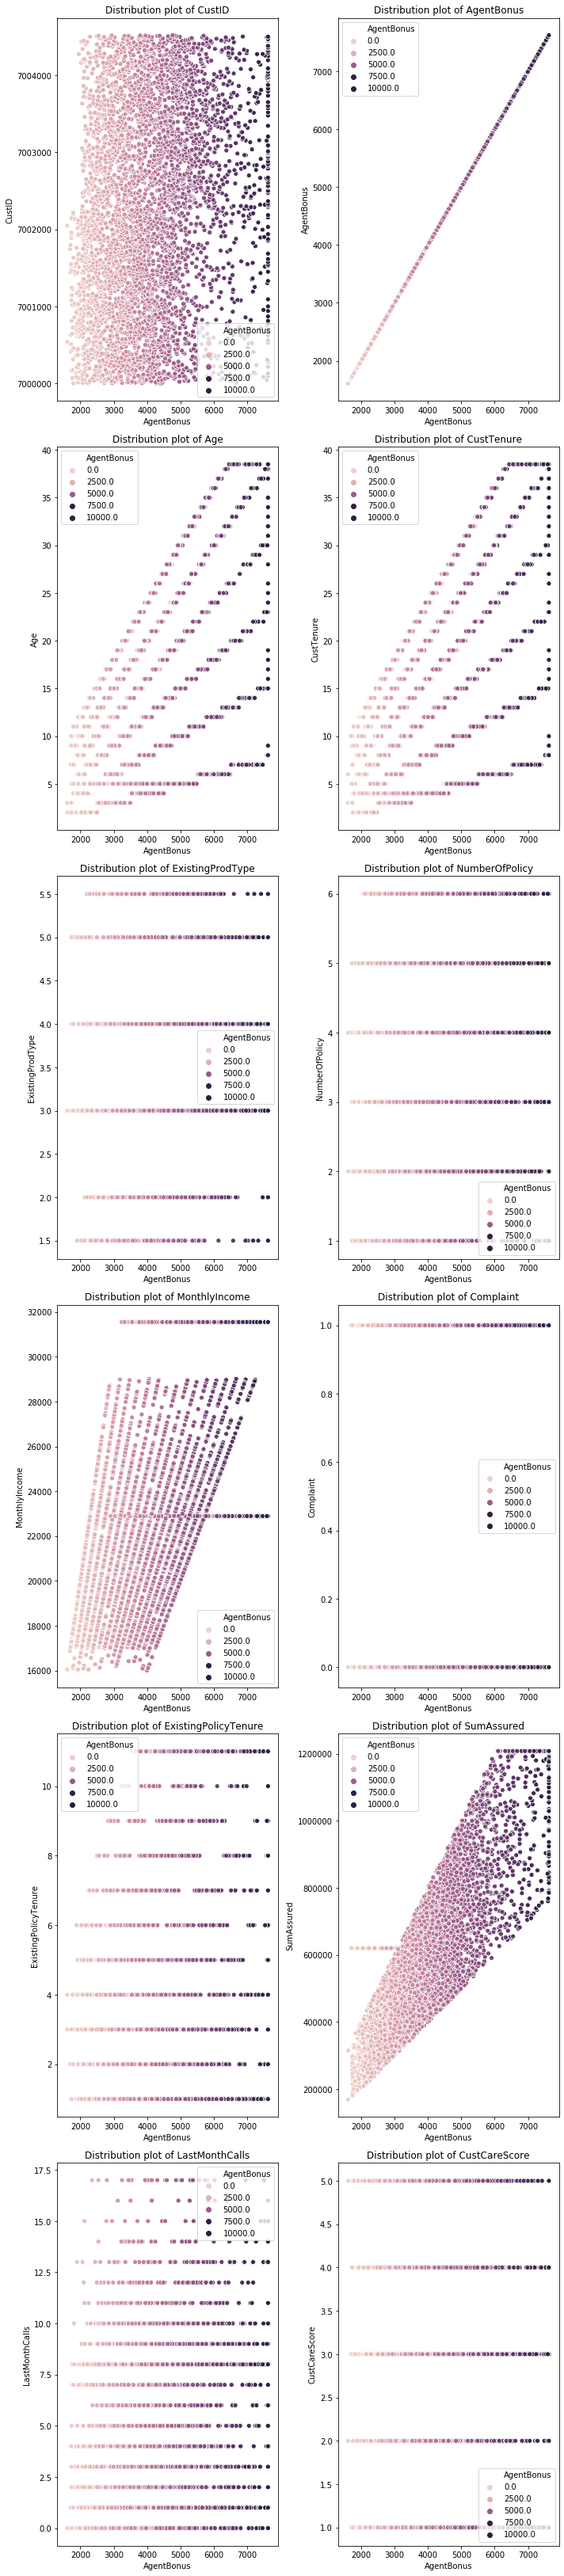

In [29]:
a = len(df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(10,90))

for i in df.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.scatterplot('AgentBonus',df[i],data=df,hue='AgentBonus')
    c = c + 1
plt.tight_layout()
plt.show()

# Examining different varaibles in dataset

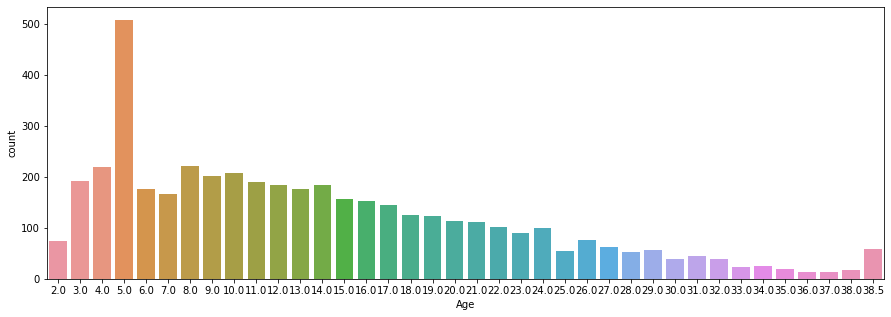

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])

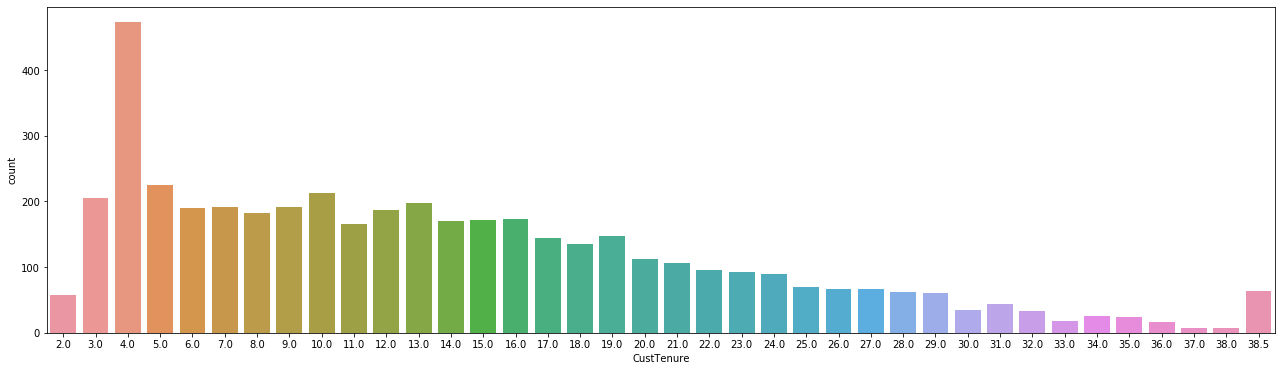

In [23]:
plt.figure(figsize=(22,6))
sns.countplot(df['CustTenure'])

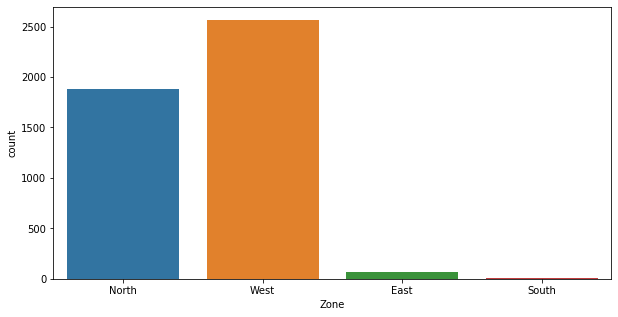

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df['Zone'])

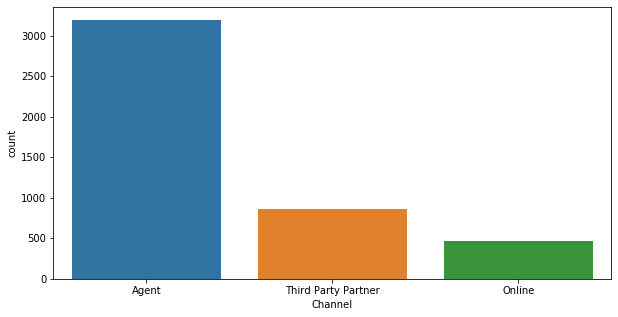

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['Channel'])

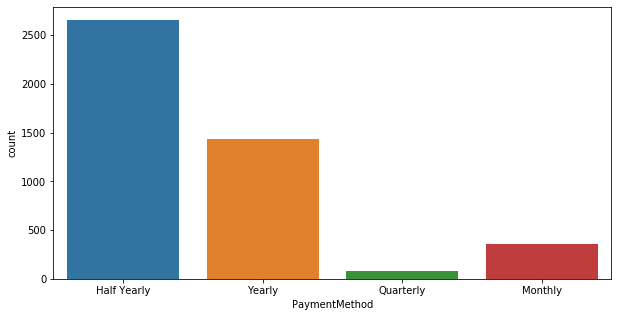

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['PaymentMethod'])
labels = ["Half Yearly 0","Monthly 1"]

# PART 2

In [27]:
df.drop(['CustID'],axis=1,inplace=True)

In [28]:
df = pd.get_dummies(df, columns=lstcategoriccolumns,drop_first=True)

In [29]:
df.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1.0,2.0,806761.000000,5.0,...,0,0,1,0,1,0,0,0,0,0
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0.0,3.0,294502.000000,7.0,...,0,0,0,0,1,0,0,0,0,1
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1.0,2.0,619999.699267,0.0,...,0,0,0,1,1,0,0,0,0,1
3,1791.0,11.0,4.0,3.0,3.0,17909.0,1.0,2.0,268635.000000,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2955.0,6.0,4.0,3.0,4.0,18468.0,0.0,4.0,366405.000000,2.0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
df.isnull().sum()

AgentBonus                       0
Age                              0
CustTenure                       0
ExistingProdType                 0
NumberOfPolicy                   0
MonthlyIncome                    0
Complaint                        0
ExistingPolicyTenure             0
SumAssured                       0
LastMonthCalls                   0
CustCareScore                    0
Channel_Online                   0
Channel_Third Party Partner      0
Occupation_Laarge Business       0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
EducationField_Engineer          0
EducationField_Graduate          0
EducationField_MBA               0
EducationField_Post Graduate     0
EducationField_UG                0
EducationField_Under Graduate    0
Gender_Female                    0
Gender_Male                      0
Designation_Exe                  0
Designation_Executive            0
Designation_Manager              0
Designation_Senior M

In [31]:
X = df.drop(['AgentBonus'], axis=1)
y = df['AgentBonus']

In [32]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [33]:
print("Train data",X_train.shape)
print("Test Data",X_test.shape)

Train data (3390, 38)
Test Data (1130, 38)


# Linear Regression

In [34]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [35]:
# R square on training data
regression_model.score(X_train, y_train)

0.809122424509397

In [36]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7814619738645575

In [37]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

596.9929773590676

In [38]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

623.1013445808952

In [39]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,AgentBonus
693,17.0,15.0,3.0,2.0,22379.000000,0.0,1.0,570217.0,4.0,2.0,...,1,0,0,0,0,1,0,0,0,2909.0
3521,18.0,14.0,5.0,5.0,22890.309991,0.0,2.0,398096.0,11.0,5.0,...,1,0,0,0,0,1,0,0,1,3523.0
3789,27.0,11.0,4.0,2.0,21776.000000,0.0,4.0,1034360.0,8.0,3.0,...,1,0,0,1,0,0,0,0,0,5444.0
2051,4.0,4.0,3.0,3.0,17821.000000,0.0,9.0,568846.0,2.0,3.0,...,1,0,0,0,0,1,0,0,0,3742.0
2404,15.0,15.0,5.0,3.0,23139.000000,0.0,1.0,704583.0,2.0,3.0,...,0,1,0,0,0,1,0,0,1,4859.0


In [40]:
data_train.columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Laarge Business',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post Graduate', 'EducationField_UG',
       'EducationField_Under Graduate', 'Gender_Female', 'Gender_Male',
       'Designation_Exe', 'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [41]:
data_train.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business" , "EducationField_Post Graduate" : "EducationField_Post_Graduate",
                            "EducationField_Under Graduate":"EducationField_Under_Graduate",
                            "Designation_Senior Manager":"Designation_Senior_Manager"}, 
                      inplace = True)

data_test.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business" , "EducationField_Post Graduate" : "EducationField_Post_Graduate",
                            "EducationField_Under Graduate":"EducationField_Under_Graduate",
                           "Designation_Senior Manager":"Designation_Senior_Manager"},
                      inplace = True)

In [42]:
data_train.columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third_Party_Partner', 'Occupation_Laarge Business',
       'Occupation_Large_Business', 'Occupation_Salaried',
       'Occupation_Small_Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post_Graduate', 'EducationField_UG',
       'EducationField_Under_Graduate', 'Gender_Female', 'Gender_Male',
       'Designation_Exe', 'Designation_Executive', 'Designation_Manager',
       'Designation_Senior_Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [43]:
exp='AgentBonus ~ Age + CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + EducationField_Engineer + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + MaritalStatus_Married + MaritalStatus_Single + MaritalStatus_Unmarried + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'

In [44]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= exp, data = data_train).fit()
lm1.params

Intercept                       -308.862450
Age                               21.584280
CustTenure                        22.798862
ExistingProdType                 -74.096130
NumberOfPolicy                     0.098293
MonthlyIncome                      0.072213
Complaint                         29.571853
ExistingPolicyTenure              38.259870
SumAssured                         0.003531
LastMonthCalls                     0.647778
CustCareScore                      8.629110
Channel_Online                    24.987669
Channel_Third_Party_Partner       -3.289607
Occupation_Large_Business        -27.616164
Occupation_Salaried               -0.407712
Occupation_Small_Business         -0.459524
EducationField_Engineer          -17.658530
EducationField_MBA              -127.483172
EducationField_Post_Graduate      12.804460
EducationField_Under_Graduate    -33.509031
Gender_Male                       15.167335
Designation_Executive            105.419991
Designation_Manager             

In [45]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     410.4
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:43:41   Log-Likelihood:                -26546.
No. Observations:                3390   AIC:                         5.316e+04
Df Residuals:                    3356   BIC:                         5.337e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [46]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

In [47]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

608.9209880058388

In [48]:
exp1='AgentBonus ~ Age + CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online  + EducationField_Engineer + EducationField_MBA + EducationField_Post_Graduate + Gender_Male + Designation_Manager + Designation_Senior_Manager  + MaritalStatus_Married + MaritalStatus_Single + MaritalStatus_Unmarried + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'

In [49]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= exp1, data = data_train).fit()
lm2.params

Intercept                      -134.512039
Age                              21.480889
CustTenure                       22.627846
ExistingProdType                -60.182839
NumberOfPolicy                    0.651886
MonthlyIncome                     0.067571
Complaint                        29.679669
ExistingPolicyTenure             38.701215
SumAssured                        0.003515
LastMonthCalls                    0.036937
CustCareScore                     9.095713
Channel_Online                   22.258761
EducationField_Engineer         -21.699018
EducationField_MBA             -118.147848
EducationField_Post_Graduate     20.266736
Gender_Male                      18.373475
Designation_Manager            -147.168605
Designation_Senior_Manager      -68.057342
MaritalStatus_Married           -51.562084
MaritalStatus_Single             16.745167
MaritalStatus_Unmarried        -150.330458
Zone_South                      156.922437
Zone_West                        -4.834612
PaymentMeth

In [50]:
## let's check the vif value

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [51]:
vif_cal(input_data=data_train.drop('AgentBonus',axis=1))

Age  VIF =  1.41
CustTenure  VIF =  1.38
ExistingProdType  VIF =  4.75
NumberOfPolicy  VIF =  1.12
MonthlyIncome  VIF =  5.24
Complaint  VIF =  1.01
ExistingPolicyTenure  VIF =  1.12
SumAssured  VIF =  1.76
LastMonthCalls  VIF =  1.2
CustCareScore  VIF =  1.03
Channel_Online  VIF =  1.05
Channel_Third_Party_Partner  VIF =  1.04
Occupation_Laarge Business  VIF =  62.39
Occupation_Large_Business  VIF =  101.63
Occupation_Salaried  VIF =  432.81
Occupation_Small_Business  VIF =  440.93
EducationField_Engineer  VIF =  18.07
EducationField_Graduate  VIF =  17.29
EducationField_MBA  VIF =  2.0
EducationField_Post_Graduate  VIF =  4.44
EducationField_UG  VIF =  1.57
EducationField_Under_Graduate  VIF =  2.58
Gender_Female  VIF =  4.77
Gender_Male  VIF =  4.54
Designation_Exe  VIF =  2.3
Designation_Executive  VIF =  8.62
Designation_Manager  VIF =  6.08
Designation_Senior_Manager  VIF =  2.82
Designation_VP  VIF =  1.84
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.89
Mari

In [52]:
# vif_cal(input_data=data_train.drop(['AgentBonus','Occupation_Salaried','Occupation_Small_Business','Occupation_Large_Business','Zone_North','Designation_Executive'],axis=1))

vif_cal(input_data=data_train.drop(['AgentBonus','Occupation_Small_Business','Zone_North','Occupation_Large_Business','EducationField_Under_Graduate','Designation_VP','Occupation_Salaried','Designation_Executive','Channel_Third_Party_Partner'],axis=1))

Age  VIF =  1.4
CustTenure  VIF =  1.37
ExistingProdType  VIF =  3.73
NumberOfPolicy  VIF =  1.11
MonthlyIncome  VIF =  1.98
Complaint  VIF =  1.01
ExistingPolicyTenure  VIF =  1.11
SumAssured  VIF =  1.74
LastMonthCalls  VIF =  1.18
CustCareScore  VIF =  1.02
Channel_Online  VIF =  1.02
Occupation_Laarge Business  VIF =  1.58
EducationField_Engineer  VIF =  1.68
EducationField_Graduate  VIF =  1.26
EducationField_MBA  VIF =  1.04
EducationField_Post_Graduate  VIF =  1.09
EducationField_UG  VIF =  1.26
Gender_Female  VIF =  4.74
Gender_Male  VIF =  4.51
Designation_Exe  VIF =  1.19
Designation_Manager  VIF =  1.22
Designation_Senior_Manager  VIF =  1.29
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.88
MaritalStatus_Unmarried  VIF =  1.36
Zone_South  VIF =  1.01
Zone_West  VIF =  1.02
PaymentMethod_Monthly  VIF =  1.98
PaymentMethod_Quarterly  VIF =  1.1
PaymentMethod_Yearly  VIF =  2.11


In [53]:
lm2 = smf.ols(formula= exp1, data = data_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     541.4
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:43:50   Log-Likelihood:                -26550.
No. Observations:                3390   AIC:                         5.315e+04
Df Residuals:                    3364   BIC:                         5.331e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [54]:
## Prediction on Training and Test set

y_pred_1_Train = lm1.fittedvalues
y_pred_2_Train = lm2.fittedvalues


y_pred_1_Test = lm1.predict(data_test)
y_pred_2_Test = lm2.predict(data_test)

In [55]:
## RMSE Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=data_train['AgentBonus'],y_pred=y_pred_1_Train,squared=False))
print('RMSE on Training Set for Model 2:',mean_squared_error(y_true=data_train['AgentBonus'],y_pred=y_pred_2_Train,squared=False))

RMSE on Training Set for Model 1: 608.9209880058395
RMSE on Training Set for Model 2: 609.6576596195792


In [56]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=data_test['AgentBonus'],y_pred=y_pred_1_Test,squared=False))
print('RMSE on Test Set for Model 2:',mean_squared_error(y_true=data_test['AgentBonus'],y_pred=y_pred_2_Test,squared=False))

RMSE on Test Set for Model 1: 633.9595739885909
RMSE on Test Set for Model 2: 632.831038053703


In [57]:
# Copy all the predictor variables into X dataframe
X = df.drop('AgentBonus', axis=1)

# Copy target into the y dataframe. 
y = df[['AgentBonus']]

# Identifying best fit model

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.25)

In [58]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [60]:
rf=RandomForestClassifier()
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=1000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
            i.fit(x_train_scaled,y_train)
            scores_train.append(i.score(x_train_scaled, y_train))
            scores_test.append(i.score(x_test_scaled, y_test))
            rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
            rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        608.208934  590.392992        0.803620    0.798161
Decision Tree Regressor    0.000000  760.245991        1.000000    0.665318
Random Forest Regressor  190.483906  519.251378        0.980738    0.843873
ANN Regressor            497.488121  606.842724        0.868612    0.786756


# Grid Search on Deciosn Tree

In [61]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 50}


# Grid Search on Random Forest

In [62]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [63]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [64]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


# Using Grid Search for ANN

In [66]:
# Using Grid Search for ANN

param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=1000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [67]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [68]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'adam'}


In [72]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='adam',random_state=123, 
                    max_iter=1000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=40,min_samples_leaf=3,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        608.208934  590.392992        0.803620    0.798161
Decision Tree Regressor  495.236822  573.495484        0.869798    0.809549
Random Forest Regressor  540.850048  583.163906        0.844709    0.803073
ANN Regressor            497.488121  606.842724        0.868612    0.786756


In [73]:
print (pd.DataFrame(rfr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                    Imp
SumAssured                     0.430643
CustTenure                     0.147939
Age                            0.135314
MonthlyIncome                  0.122517
ExistingPolicyTenure           0.035902
Designation_VP                 0.031614
Designation_Executive          0.023948
Designation_Manager            0.013429
LastMonthCalls                 0.012173
Designation_Senior Manager     0.007222
Designation_Exe                0.004794
ExistingProdType               0.004702
MaritalStatus_Unmarried        0.003864
NumberOfPolicy                 0.003687
Gender_Female                  0.002636
CustCareScore                  0.002612
EducationField_UG              0.001531
EducationField_Under Graduate  0.001157
MaritalStatus_Married          0.001078
Zone_North                     0.001078
Zone_West                      0.001074
MaritalStatus_Single           0.001051
Gender_Male                    0.001030
Complaint                      0.001022


In [74]:
cov_matrix = np.cov(df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.84493685e+06  6.69771508e+03  6.65892831e+03 ... -2.71375490e+00
  -1.51489620e+00 -6.17078197e+00]
 [ 6.69771508e+03  7.74516142e+01  2.55636137e+01 ... -4.75225547e-03
   9.72658216e-03  2.25033634e-02]
 [ 6.65892831e+03  2.55636137e+01  7.68278262e+01 ... -4.52099983e-02
  -2.27395833e-02 -6.43301537e-05]
 ...
 [-2.71375490e+00 -4.75225547e-03 -4.52099983e-02 ...  7.22007571e-02
  -1.31715255e-03 -2.48525890e-02]
 [-1.51489620e+00  9.72658216e-03 -2.27395833e-02 ... -1.31715255e-03
   1.65351015e-02 -5.33558407e-03]
 [-6.17078197e+00  2.25033634e-02 -6.43301537e-05 ... -2.48525890e-02
  -5.33558407e-03  2.16652795e-01]]


In [75]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-4.96868364e-03 -8.47763654e-02  9.96377273e-01 ...  7.74188358e-06
   4.54913220e-06 -4.12247956e-06]
 [-1.83436629e-05 -4.59698025e-04  3.09133377e-03 ... -2.94485504e-05
  -1.31935556e-04 -3.76622203e-04]
 [-1.82075852e-05 -4.16254708e-04  3.18495983e-03 ...  3.13657941e-04
  -9.60911455e-06 -1.63276585e-04]
 ...
 [ 2.77466493e-08  1.73400211e-06  1.38987894e-05 ... -5.51772304e-02
  -9.62691825e-02  2.63483812e-01]
 [ 1.03840534e-08 -1.50060355e-07  2.26132609e-06 ...  2.54654857e-02
   1.00983201e-01 -2.45627486e-01]
 [ 1.23612622e-08 -1.15357663e-06 -9.08688890e-06 ...  1.62162890e-02
   7.17960192e-02 -9.55980953e-02]]

 Eigen Values 
%s [5.25624773e+10 1.25438878e+07 4.60460909e+05 5.37255287e+01
 5.15606382e+01 1.14652690e+01 7.78447605e+00 2.07921782e+00
 1.89030258e+00 9.49773376e-01 7.20262245e-01 4.84051024e-01
 4.29079835e-01 3.56045573e-01 3.22300861e-01 2.04121114e-01
 2.01244389e-01 1.57299406e-01 1.48911795e-01 1.18219969e-01
 9.67008128e-02 9.3977

In [76]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 99.97526512  99.99912394  99.99999975  99.99999985  99.99999995
  99.99999997  99.99999998  99.99999999  99.99999999  99.99999999
  99.99999999 100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.        ]


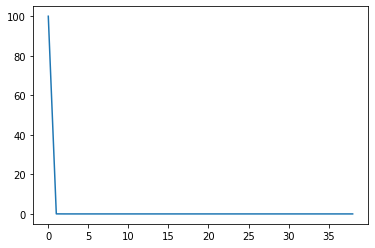

In [77]:
plt.plot(var_exp)

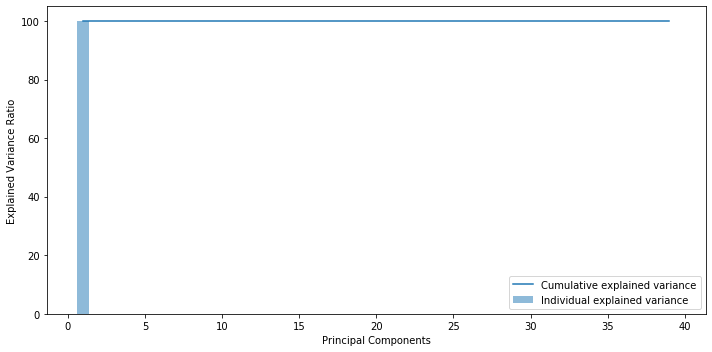

In [78]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [79]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(df)
data_reduced.transpose()

array([[ 1.90840212e+05, -3.21414771e+05,  4.05597862e+03, ...,
         5.14676654e+04,  3.28067312e+05,  8.44152829e+04],
       [-3.09425705e+03,  1.54335034e+01, -5.47952537e+03, ...,
        -1.25353335e+02, -5.09472478e+03,  6.16153022e+02],
       [-3.40928482e+02, -2.53998552e+02,  6.56993278e+02, ...,
        -5.17687765e+02, -4.46580641e+02,  2.30363328e+02],
       ...,
       [-1.28730414e+01, -6.40627787e+00, -1.56980444e+01, ...,
         5.27216588e-01, -4.25693286e-01, -3.04040461e+00],
       [ 6.27970257e-01,  3.20705103e+00, -3.21182831e+00, ...,
        -1.04393536e+00, -2.46820887e+00, -4.13756945e+00],
       [-2.52183745e+00, -7.28773916e-02, -2.14430851e+00, ...,
        -1.45636525e+00,  1.55273245e+00, -6.70165151e-01]])

In [80]:
len(pca.components_)

7

In [81]:
df_comp = pd.DataFrame(pca.components_,columns=list(df))
df_comp.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,0.004969,0.000018,0.000018,4.096192e-07,3.963344e-07,0.007719,4.066665e-09,0.000003,9.999579e-01,0.000002,...,2.597126e-07,9.509540e-08,-1.572729e-08,-9.357627e-08,4.259302e-08,-2.719102e-09,-2.774497e-08,-2.774665e-08,-1.038405e-08,-1.236126e-08
1,0.084776,0.000460,0.000416,4.809769e-05,5.363084e-05,0.996367,-1.491757e-07,-0.000039,-8.112389e-03,0.000330,...,2.747013e-05,5.368982e-06,6.042846e-06,-1.463639e-05,-3.473882e-06,-3.431926e-08,2.289574e-06,-1.734002e-06,1.500604e-07,1.153577e-06
2,0.996377,0.003091,0.003185,-3.173989e-05,-1.025798e-05,-0.084815,1.665722e-05,0.000763,-4.296308e-03,0.000022,...,4.735313e-06,-2.084629e-05,2.194863e-05,-1.005169e-05,-2.771328e-06,7.640408e-08,9.804823e-07,1.389879e-05,2.261326e-06,-9.086889e-06
3,0.004471,-0.731552,-0.681598,-6.916058e-03,-4.214439e-03,0.000246,-2.968038e-04,-0.003133,1.755570e-06,-0.008939,...,6.940800e-04,6.975936e-04,-1.707505e-03,1.336717e-03,1.177825e-03,-1.450078e-05,-1.075147e-03,2.268874e-04,2.721316e-06,-8.271978e-04
4,-0.000221,-0.681702,0.731607,2.273837e-03,-1.182040e-04,0.000027,-4.786010e-04,-0.000014,6.789840e-08,0.001940,...,-4.735274e-04,1.161504e-03,-1.965948e-03,5.810595e-04,7.810681e-04,2.116658e-05,-8.255934e-04,-5.913588e-04,-4.476488e-04,-2.580300e-04


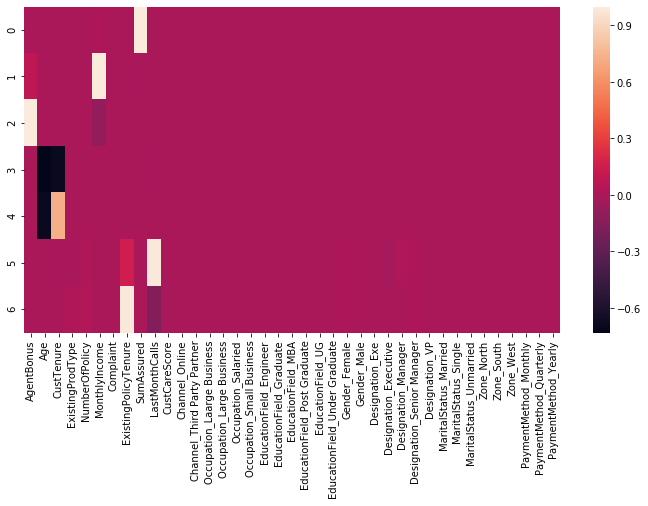

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)